# Inserção das Mulheres na área de TI nos últimos 10 anos

Análise de dados do número de mulheres versus o número de homens que entram nos cursos da área de Tecnologia da Informação (TI) e também analisar a quantidades de alunos que cursam os cursos e quantos se formam.


In [1]:
#importando os módulos

import pandas as pd
import numpy as np
from scipy.stats import mode
low_memory=False

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [2]:
#Leitura do dataset utilizado na análise
df = pd.read_csv(r'df2009_df2018.csv', delimiter=',')

In [3]:
#Visualizando as primeiras linhas do dataset
df.head()

,IDADE,ANO,SEXO,SITUACAO,CURSO
0,29,2009,Masculino,Cursando,ANALISE E DESENVOLVIMENTO DE SISTEMAS
1,21,2009,Masculino,Desvinculado do curso,ANALISE E DESENVOLVIMENTO DE SISTEMAS
2,20,2009,Masculino,Cursando,COMPUTACAO
3,41,2009,Masculino,Matrícula trancada,ANALISE E DESENVOLVIMENTO DE SISTEMAS
4,18,2009,Masculino,Cursando,INFORMATICA


In [4]:
#Visualizar o número de linhas e colunas
df.shape

(1217117, 5)

In [5]:
#Verificação dos tipos de dados
df.dtypes

IDADE        int64
ANO          int64
SEXO        object
SITUACAO    object
CURSO       object
dtype: object

In [6]:
# Verificação da descrição da idade
df['IDADE'].describe()

count    1.217117e+06
mean     2.707266e+01
std      7.438209e+00
min      1.300000e+01
25%      2.100000e+01
50%      2.500000e+01
75%      3.100000e+01
max      8.400000e+01
Name: IDADE, dtype: float64

In [7]:
#Agrupamento da mediana - por sexo e idade
df.groupby('SEXO')['IDADE'].median()

SEXO
Feminino     25
Masculino    25
Name: IDADE, dtype: int64

In [8]:
#Agrupamento da média - por sexo e idade
df.groupby('SEXO')['IDADE'].mean()

SEXO
Feminino     26.613892
Masculino    27.164551
Name: IDADE, dtype: float64

In [9]:
#filtro dos dados por sexo
masc = df[df['SEXO'] == 'Masculino'] 
femi = df[df['SEXO'] == 'Feminino']

In [10]:
#Moda da idade dos homens
masc.mode()

,IDADE,ANO,SEXO,SITUACAO,CURSO
0,21,2018,Masculino,Cursando,ANALISE E DESENVOLVIMENTO DE SISTEMAS


In [11]:
#Moda da idade das mulheres
femi.mode()

,IDADE,ANO,SEXO,SITUACAO,CURSO
0,20,2018,Feminino,Cursando,ANALISE E DESENVOLVIMENTO DE SISTEMAS


<AxesSubplot:ylabel='Frequency'>

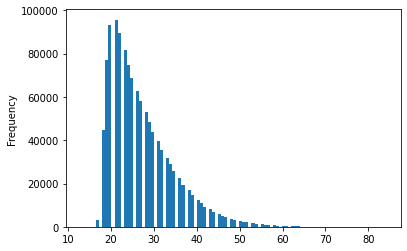

In [12]:
#Histograma da idade 
df['IDADE'].plot(kind = 'hist', bins = 100)

In [13]:
#Verificação da Assemetria 
df.IDADE.skew()

1.2870010570455597

#### Assimetria positiva, ou seja, distribuição tem uma cauda e média está à direita.

A obliquidade mede a assimetria das caudas da distribuição. Distribuições assimétricas que tem uma cauda mais "pesada" que a outra apresentam obliquidade. Distribuições simétricas tem obliquidade zero. Assim:

- Se v>0, então a distribuição tem uma cauda direita (valores acima da média) mais pesada
- Se v<0, então a distribuição tem uma cauda esquerda (valores abaixo da média) mais pesada
- Se v=0, então a distribuição é aproximadamente simétrica (na terceira potência do desvio em relação à média).

In [14]:
df.IDADE.kurtosis()

1.9136320583452933

#### Curtose-leptocurtica, possui a curva da função de distribuição mais afunilada com um pico mais alto do que a distribuição normal


A curtose é uma medida de forma que caracteriza o achatamento da curva da função de distribuição de probabilidade

- Se o valor da curtose for = 0 (ou 3, pela segunda definição), então tem o mesmo achatamento que a distribuição normal. Chama-se a estas funções de mesocúrticas
- Se o valor é > 0 (ou > 3), então a distribuição em questão é mais alta (afunilada) e concentrada que a distribuição normal. Diz-se que esta função probabilidade é leptocúrtica, ou que a distribuição tem caudas pesadas (o significado é que é relativamente fácil obter valores que não se aproximam da média a vários múltiplos do desvio padrão)
- Se o valor é < 0 (ou < 3), então a função de distribuição é mais "achatada" que a distribuição normal. Chama-se-lhe platicúrtica


In [15]:
#Cursos compreendido no dataset
df['CURSO'].unique()

array(['ANALISE E DESENVOLVIMENTO DE SISTEMAS', 'COMPUTACAO',
       'INFORMATICA', 'TECNOLOGIA DA INFORMACAO'], dtype=object)

# Visualização dos Dados

<AxesSubplot:ylabel='CURSO'>

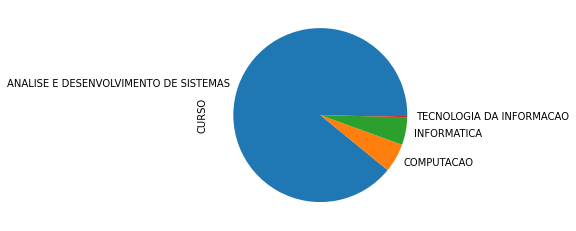

In [16]:
#Gráfico para visualizar a distribuição do número de alunos por curso.
df['CURSO'].value_counts().plot.pie()

<AxesSubplot:ylabel='SITUACAO'>

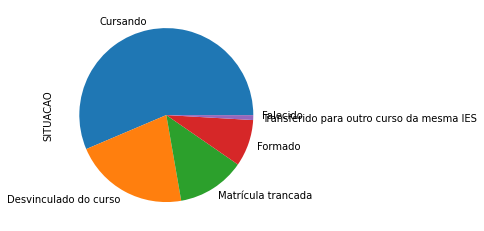

In [17]:
#Gráfico para visualizar a distribuição do número de alunos por situação.
df["SITUACAO"].value_counts().plot.pie()

<AxesSubplot:ylabel='SEXO'>

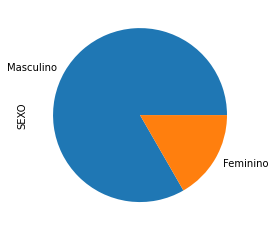

In [18]:
#Gráfico para visualizar a distribuição do número de alunos por sexo.
df["SEXO"].value_counts().plot.pie()

In [19]:
#Criação de categorias para idade
df['idade_categoria'] = pd.cut(
    df['IDADE'],
    bins = ( 13, 20, 30, 40, 50, 60, 70, 80, 84),
    labels = ('13 a 20', '20 a 30', '30 a 40', '40 a 50', '50 a 60', '60 a 70', '70 a 80', '80 a 84'))

#### Gráfico 'Faixa etária - Mulheres x Homens no Curso de TI'
No eixo x temos as categorias de idade e no eixo y as quantidades de alunos por sexo.

<AxesSubplot:title={'center':'Faixa etária - Mulheres x Homens no Curso de TI'}, xlabel='idade_categoria'>

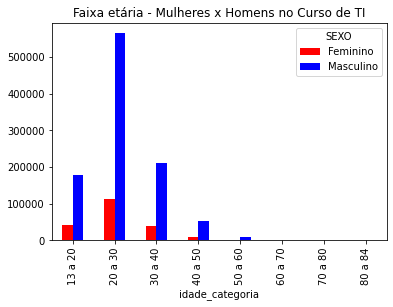

In [20]:
situacao_sexo_id = pd.crosstab(df['idade_categoria'],df['SEXO'])
situacao_sexo_id.plot(kind='bar',width=0.5, color=['red','blue'], title='Faixa etária - Mulheres x Homens no Curso de TI')

#### Gráfico Porcentagem Mulheres x Homens no Curso de TI - Por Curso'
No eixo x temos os cursos e no eixo y a porcentagem de alunos por sexo.

<AxesSubplot:title={'center':'Porcentagem Mulheres x Homens no Curso de TI - Por Curso'}, xlabel='CURSO'>

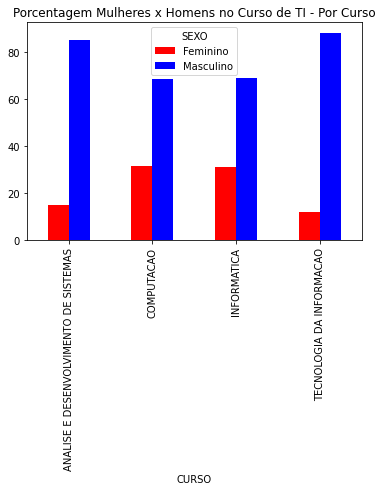

In [21]:
curso_sexo = pd.crosstab(df['CURSO'],df['SEXO']).apply(lambda r: r/r.sum(), axis=1) * 100
curso_sexo.plot(kind='bar',width=0.5, color=['red','blue'], title='Porcentagem Mulheres x Homens no Curso de TI - Por Curso')

#### Gráfico 'Situação Mulheres x Homens no Curso de TI'
No eixo x temos situação dos alunos e no eixo y o número de alunos por sexo.

<AxesSubplot:title={'center':'Situação Mulheres x Homens no Curso de TI'}, xlabel='SITUACAO'>

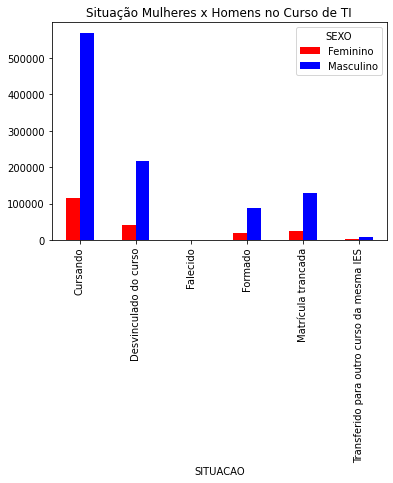

In [22]:
situacao_sexo = pd.crosstab(df['SITUACAO'],df['SEXO'])
situacao_sexo.plot(kind='bar',width=0.5, color=['red','blue'], title='Situação Mulheres x Homens no Curso de TI')

In [23]:
curso_ano = pd.crosstab(df['ANO'],df['SEXO'])
curso_ano

SEXO,Feminino,Masculino
ANO,,
2009,10164,40309
2010,13887,58140
2011,16777,73014
2012,19052,86917
2013,20876,98899
2014,23483,115072
2015,23559,121969
2016,23639,129352
2017,24430,136797


In [24]:
df_teste = pd.DataFrame(curso_ano)

In [25]:
df_teste.head(15).T

ANO,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
SEXO,,,,,,,,,,
Feminino,10164,13887,16777,19052,20876,23483,23559,23639,24430,27247
Masculino,40309,58140,73014,86917,98899,115072,121969,129352,136797,153534


In [26]:
data = {
    '2009': [10164, 40309],
    '2010': [13887, 58140],
    '2011': [16777, 73014],
    '2012': [19052, 86917],
    '2013': [20876, 98899],
    '2014': [23483, 115072],
    '2015': [23559, 121969],
    '2016': [23639, 129352],
    '2017': [24430, 136797],
    '2018': [27247, 153534],
    'sexo': [0,1]    
}

In [27]:
df_model = pd.DataFrame(data, columns=['2009','2010','2011', '2012', '2013', '2014',
                                       '2015', '2016', '2017', '2018', 'sexo'])

In [28]:
df_model.head(15)

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,sexo
0,10164,13887,16777,19052,20876,23483,23559,23639,24430,27247,0
1,40309,58140,73014,86917,98899,115072,121969,129352,136797,153534,1


In [29]:
X = df_model.drop(['sexo'], axis=1)

In [30]:
y = df_model['sexo']

In [31]:
reg = LinearRegression().fit(X, y)

NameError: name 'LinearRegression' is not defined

In [32]:
reg.score(X, y)

NameError: name 'reg' is not defined

In [33]:
reg.coef_

NameError: name 'reg' is not defined

In [34]:
reg.intercept_

NameError: name 'reg' is not defined

#### Gráfico 'Inserção Mulheres x Homens no Curso de TI entre os anos de 2009 a 2018 no Brasil'
No eixo x temos os anos e no eixo y o número de alunos por sexo.

<AxesSubplot:title={'center':'Inserção Mulheres x Homens no Curso de TI entre os anos de 2009 a 2018 no Brasil'}, xlabel='ANO'>

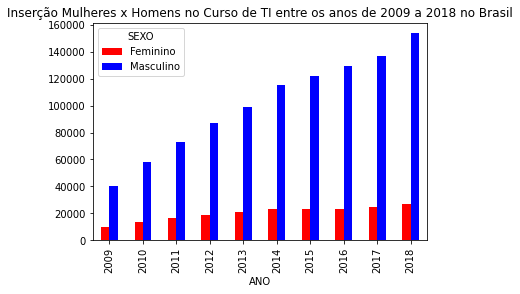

In [35]:
curso_ano.plot(kind='bar',width=0.5, color=['red','blue'], 
               title='Inserção Mulheres x Homens no Curso de TI entre os anos de 2009 a 2018 no Brasil' ,grid=False)

In [36]:
curso_ano_per = pd.crosstab(df['ANO'],df['SEXO']).apply(lambda r: r/r.sum(), axis=1) * 100
curso_ano_per

SEXO,Feminino,Masculino
ANO,,
2009,20.137499,79.862501
2010,19.280270,80.719730
2011,18.684501,81.315499
2012,17.978843,82.021157
2013,17.429347,82.570653
2014,16.948504,83.051496
2015,16.188637,83.811363
2016,15.451236,84.548764
2017,15.152549,84.847451


In [37]:
per_2009 = pd.Series({'Ano':2009, 'Feminino':20.13, 'Masculino':79.87})
per_2010 = pd.Series({'Ano':2010, 'Feminino':19.28, 'Masculino':80.72})
per_2011 = pd.Series({'Ano':2011, 'Feminino':18.68, 'Masculino':81.32})
per_2012 = pd.Series({'Ano':2012, 'Feminino':17.97, 'Masculino':82.03})
per_2013 = pd.Series({'Ano':2013, 'Feminino':17.43, 'Masculino':82.57})
per_2014 = pd.Series({'Ano':2014, 'Feminino':16.94, 'Masculino':83.06})
per_2015 = pd.Series({'Ano':2015, 'Feminino':16.20, 'Masculino':83.80})
per_2016 = pd.Series({'Ano':2016, 'Feminino':15.45, 'Masculino':84.55})
per_2017 = pd.Series({'Ano':2017, 'Feminino':15.15, 'Masculino':84.85})
per_2018 = pd.Series({'Ano':2019, 'Feminino':15.07, 'Masculino':84.93})

In [38]:
df_per = pd.DataFrame([per_2009, per_2010, per_2011, per_2012, per_2013, per_2014,
                       per_2015, per_2016, per_2017, per_2018])

In [39]:
df_per

,Ano,Feminino,Masculino
0,2009.0,20.13,79.87
1,2010.0,19.28,80.72
2,2011.0,18.68,81.32
3,2012.0,17.97,82.03
4,2013.0,17.43,82.57
5,2014.0,16.94,83.06
6,2015.0,16.20,83.80
7,2016.0,15.45,84.55
8,2017.0,15.15,84.85
9,2019.0,15.07,84.93


In [40]:
df_per.corr()

,Ano,Feminino,Masculino
Ano,1.000000,-0.979503,0.979503
Feminino,-0.979503,1.000000,-1.000000
Masculino,0.979503,-1.000000,1.000000


In [41]:
df_per.cov()

,Ano,Feminino,Masculino
Ano,10.266667,-5.595556,5.595556
Feminino,-5.595556,3.178667,-3.178667
Masculino,5.595556,-3.178667,3.178667


In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
X = df_per.drop(['Ano'], axis=1)

In [44]:
y = df_per['Ano']

In [45]:
reg = LinearRegression().fit(X,y)

In [46]:
reg.score(X, y)

0.9682088744588745

In [47]:
reg.intercept_

-1333817361504680.5

In [48]:
import seaborn as sns

In [49]:
x = df_per['Ano']

In [50]:
y = df_per['Feminino']

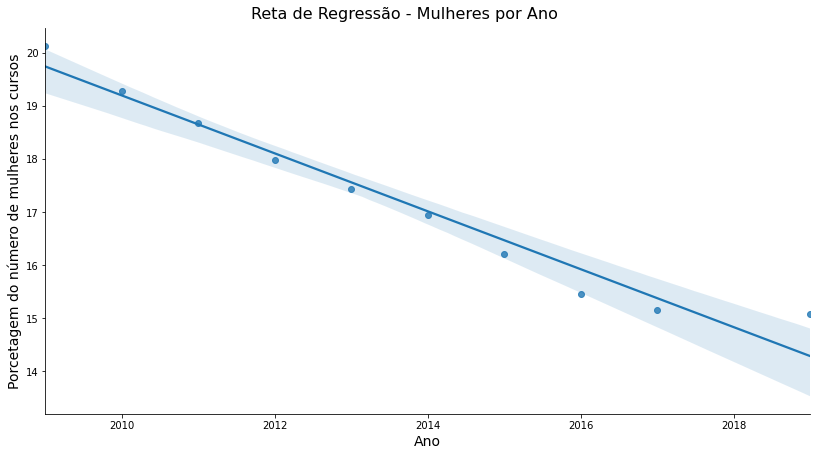

In [51]:
ax = sns.lmplot(x="Ano", y="Feminino", data=df_per)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle("Reta de Regressão - Mulheres por Ano", fontsize=16, y=1.02)
ax.set_xlabels("Ano", fontsize=14)
ax.set_ylabels("Porcetagem do número de mulheres nos cursos", fontsize=14)
ax

In [52]:
y = df_per['Masculino']

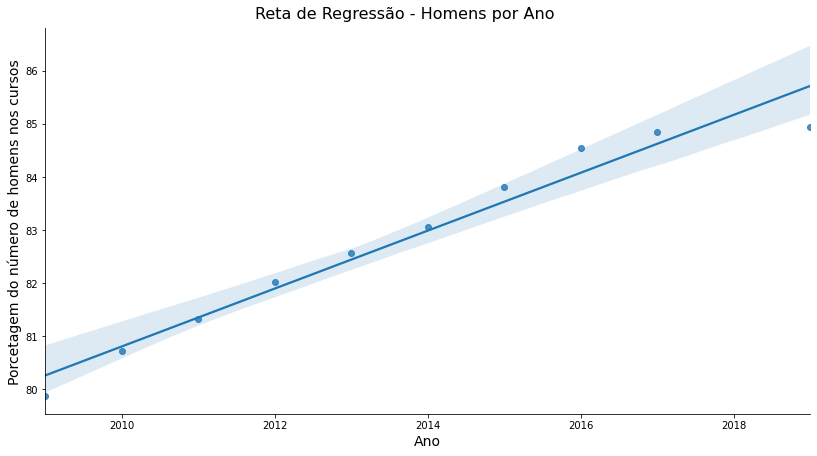

In [53]:
ax = sns.lmplot(x="Ano", y="Masculino", data=df_per)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle("Reta de Regressão - Homens por Ano", fontsize=16, y=1.02)
ax.set_xlabels("Ano", fontsize=14)
ax.set_ylabels("Porcetagem do número de homens nos cursos", fontsize=14)
ax

In [55]:
import statsmodels.api as sm

In [56]:
Y = y
X = sm.add_constant(x)

/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [57]:
Y.head()

0    79.87
1    80.72
2    81.32
3    82.03
4    82.57
Name: Masculino, dtype: float64

In [58]:
X.head()

,const,Ano
0,1.0,2009.0
1,1.0,2010.0
2,1.0,2011.0
3,1.0,2012.0
4,1.0,2013.0


In [59]:
resultado_regressao = sm.OLS(Y, X).fit()

In [60]:
(print(resultado_regressao.summary()))

                            OLS Regression Results                            
Dep. Variable:              Masculino   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     189.2
Date:                Mon, 19 Oct 2020   Prob (F-statistic):           7.53e-07
Time:                        21:57:16   Log-Likelihood:                -3.4216
No. Observations:                  10   AIC:                             10.84
Df Residuals:                       8   BIC:                             11.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1014.6856     79.791    -12.717      0.0

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [61]:
 print(resultado_regressao.t_test([1, 0]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0         -1014.6856     79.791    -12.717      0.000   -1198.684    -830.687


#### Gráfico 'Porcentagem Mulheres x Homens no Curso de TI entre os anos de 2009 a 2018 no Brasil'
No eixo x temos os anos e no eixo y a porcentagem de alunos por sexo.

<AxesSubplot:title={'center':'Porcentagem Mulheres x Homens no Curso de TI entre os anos de 2009 a 2018 no Brasil'}, xlabel='ANO'>

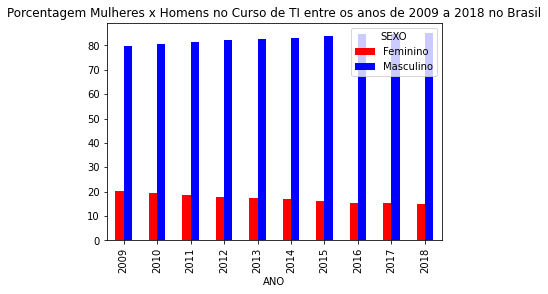

In [26]:
curso_ano_per.plot(kind='bar',width=0.5, color=['red','blue'],
                   title='Porcentagem Mulheres x Homens no Curso de TI entre os anos de 2009 a 2018 no Brasil', grid=False)

- Como na descrição da Idade, percebemos que 75% está em até 31 anos, portanto, foi criada a categoria de alunos maior e menor que 31 anos. 

In [27]:
#Quantos alunos acima de 31 anos estudam?
#Criação da categoria

df['alunos_idade'] = ['> 31' if x > 31 else '< 31' for x in df['IDADE']]

In [28]:
df['alunos_idade'].value_counts() 

< 31    934757
> 31    282360
Name: alunos_idade, dtype: int64

In [29]:
df['idade_categoria'].value_counts().reset_index().sort_values('index', ascending=True)

,index,idade_categoria
2,13 a 20,218388
0,20 a 30,676708
1,30 a 40,247817
3,40 a 50,60707
4,50 a 60,12108
5,60 a 70,1289
6,70 a 80,93
7,80 a 84,5


## Como o curso de Análise e Desenvolvimento de Sistemas apresentou o maior número de alunos do dataset
Foi criado filtros para saber a situação do aluno por sexo no curso de ADS

In [30]:
x = pd.DataFrame(df.query('SITUACAO == "Formado" and SEXO =="Masculino" and CURSO == "ANALISE E DESENVOLVIMENTO DE SISTEMAS"'))
y = pd.DataFrame(df.query('SITUACAO == "Formado" and SEXO =="Feminino" and CURSO == "ANALISE E DESENVOLVIMENTO DE SISTEMAS"'))

z = pd.DataFrame(df.query('SITUACAO == "Cursando" and SEXO =="Masculino" and CURSO == "ANALISE E DESENVOLVIMENTO DE SISTEMAS"'))
w = pd.DataFrame(df.query('SITUACAO == "Cursando" and SEXO =="Feminino" and CURSO == "ANALISE E DESENVOLVIMENTO DE SISTEMAS"'))

In [31]:
# Concatena os dataframes criados acima
data = pd.concat([x, y, z, w])

In [32]:
sit_sex = pd.crosstab(data['SITUACAO'],data['SEXO']).apply(lambda r: r/r.sum(), axis=1) * 100
sit_sex

SEXO,Feminino,Masculino
SITUACAO,,
Cursando,14.837883,85.162117
Formado,15.913133,84.086867


#### Gráfico 'Cursando X Formados no Curso de ADS'
No eixo x temos a situação e no eixo y a porcentagem de alunos por sexo.

<Figure size 864x432 with 0 Axes>

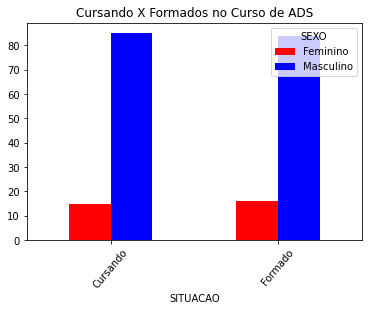

In [33]:
plt.figure(figsize= (12, 6))
sit_sex.plot(kind='bar',width=0.5, color=['red','blue'], title='Cursando X Formados no Curso de ADS')
plt.xticks(rotation = 50)
plt.show()

In [34]:
sit_ano = pd.crosstab(data['ANO'],data['SITUACAO']).apply(lambda r: r/r.sum(), axis=1) * 100
sit_ano

SITUACAO,Cursando,Formado
ANO,,
2009,90.411962,9.588038
2010,87.475000,12.525000
2011,87.001977,12.998023
2012,87.829746,12.170254
2013,87.414197,12.585803
2014,86.000541,13.999459
2015,84.413776,15.586224
2016,83.934510,16.065490
2017,85.161905,14.838095


#### Gráfico 'Situação Cursando X Formados no Curso de ADS nos anos de 2009 à 2018'
No eixo x temos os anos e no eixo y a porcentagem de alunos por sexo.

<AxesSubplot:title={'center':'Situação Cursando X Formados no Curso de ADS nos anos de 2009 à 2018'}, xlabel='ANO'>

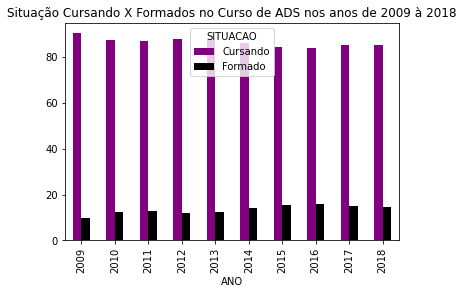

In [35]:
sit_ano.plot(kind='bar',width=0.5, color=['purple','black'], 
             title='Situação Cursando X Formados no Curso de ADS nos anos de 2009 à 2018')